In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

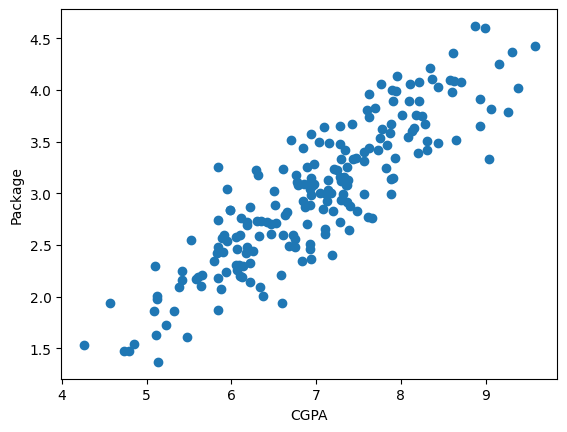

In [60]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [7]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

NameError: name 'X' is not defined

### Building a linear regression model from scratch

In [8]:
class linearReg:
    def _init_(self):
        self.m = None
        self.b = None
    
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += (X_train[i] - X_train.mean()) * (y_train[i]-y_train.mean())
            den += (X_train[i]-X_train.mean())**2
        self.m = num/den #Slope
        self.b = y_train.mean() - (self.m*X_train.mean())
        print("The value of slope is", self.m)
        print("The value of intercept is", self.b)
    
    def predict(self, X_test):
        return self.m*X_test + self.b

In [51]:
lr = linearReg()

In [52]:
lr.fit(X_train, y_train)

The value of slope is 0.5579519734250721
The value of intercept is -0.8961119222429152


In [53]:
lr.predict(X_test[0])

3.891116009744203

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
pred = lr.predict(X_test)

In [68]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [71]:
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Sqaured Error:",mean_squared_error(y_test,pred))
print("R2 Score:",r2_score(y_test, pred))

Mean Absolute Error: 0.2884710931878174
Mean Sqaured Error: 0.12129235313495523
R2 Score: 0.7807301475103842


In [74]:
r2 = r2_score(y_test, pred)
1- ((1-r2)*(40-1)/(40-1-1))

0.7749598882343417

### Linear Regression using Sklearn

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [44]:
model.fit(X_train.reshape(160,1),y_train)

LinearRegression()

In [45]:
model.coef_

array([0.55795197])

In [46]:
model.intercept_

-0.8961119222429144

In [55]:
model.predict(X_test[0].reshape(1,1))

array([3.89111601])

Text(0, 0.5, 'Package')

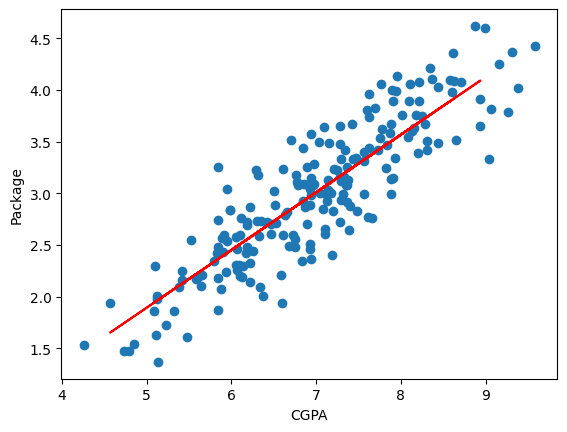

In [64]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test.reshape(-1,1), model.predict(X_test.reshape(-1,1)),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

### Gradient Descent 

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=100, n_features=1,n_targets=1,n_informative=1,noise=20)

Text(0, 0.5, 'Y')

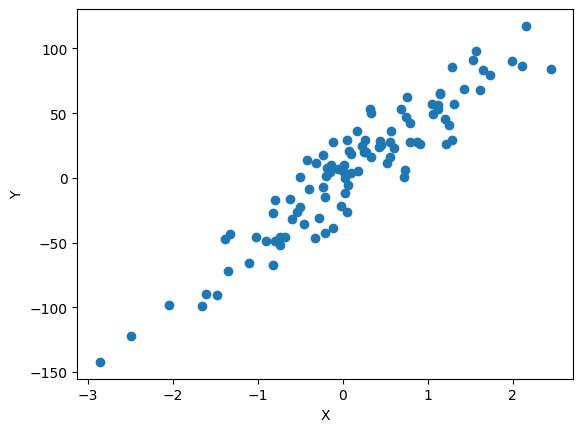

In [6]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')

In [10]:
model.fit(X,y)

LinearRegression()

In [13]:
print("b:",model.intercept_)
print("m:",model.coef_)

b: 0.5783891707410707
m: [47.55016745]


In [49]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 1
        self.b = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.m = self.m - (slope_m * self.learning_rate)
            self.b = self.b - (slope_b * self.learning_rate)
        print(self.b)
        print(self.m)

    def predict(self,X):
        return self.m*X+self.b

In [50]:
gd = GDRegressor(0.001,50)

In [51]:
gd.fit(X,y)

0.5803129294207875
47.548213629545565


In [68]:
all_m = []
all_b = []
costs = []
epochs = 100
lr = 0.001
m=1
b=0

for i in range(epochs):
    slope_m = 0
    slope_b = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b) * X[j]
        slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
        cost = cost + (y[j] - m*X[j] - b)**2
    
    b = b - (lr*slope_b)
    m = m - (lr*slope_m)
    all_m.append(m)
    all_b.append(b)
    costs.append(cost)

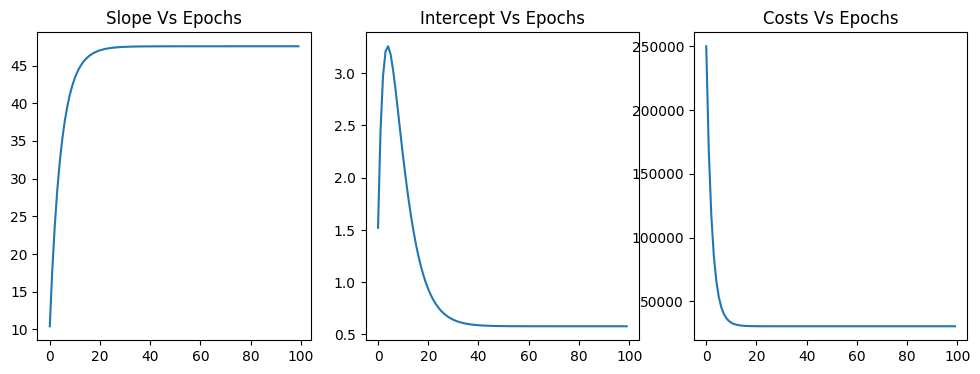

In [100]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
ax[0].plot(range(epochs),all_m)
ax[0].set_title("Slope Vs Epochs")

ax[1].plot(range(epochs),all_b)
ax[1].set_title("Intercept Vs Epochs")

ax[2].plot(range(epochs),costs)
ax[2].set_title("Costs Vs Epochs")
plt.show()

### Batch Gradient Descent

First, I will find out the true values of our model parameters using sklearn Linear Regression library and then build a gradient descent regressor from scratch. The results of the GD Regressor will be validated using the parameters from the sklearn library. 

In [104]:
from sklearn.datasets import load_diabetes

In [105]:
X, y = load_diabetes(return_X_y=True)

In [109]:
X.shape, y.shape

((442, 10), (442,))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
model = LinearRegression()

In [114]:
model.fit(X_train,y_train)

LinearRegression()

In [115]:
model.coef_, model.intercept_

(array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 151.88331005254167)

In [117]:
y_pred = model.predict(X_test)
print("R2-score: ",r2_score(y_test,y_pred))

R2-score:  0.4399338661568968


In [144]:
class BatchGD:
    def __init__(self, lr=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        for i in range(self.epochs):
            #find all the coefs and intercept
            y_pred = np.dot(X_train,self.coef_) + self.intercept_
            slope_intercept = -2 * np.mean(y_train - y_pred)
            slope_coefs = -2 * np.dot((y_train - y_pred),X_train)/X_train.shape[0]
            self.intercept_ = self.intercept_ - (self.lr * slope_intercept)
            self.coef_ = self.coef_ - (self.lr * slope_coefs)
        print(self.intercept_, self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+self.intercept_

In [158]:
gdr = BatchGD(epochs=8000,lr=0.5)

In [159]:
gdr.fit(X_train,y_train)

151.90141097967393 [  -7.42940816 -200.25804805  533.05651889  338.2634986  -151.48112873
  -41.99407003 -163.69822168   56.86549886  576.38015812   53.5888146 ]


In [160]:
preds = gdr.predict(X_test)

In [161]:
r2_score(y_test,preds)

0.4430953068262389

### Stochastic GD

In [168]:
class SGD:
    def __init__(self, lr=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                y_preds = np.dot(X_train[idx],self.coef_) + self.intercept_
                slope_intercept = -2 * (y_train[idx] - y_preds)
                slope_coefs = -2 * np.dot((y_train[idx] - y_preds),X_train[idx])
                self.intercept_ = self.intercept_ - (self.lr * slope_intercept)
                self.coef_ = self.coef_ - (self.lr * slope_coefs)
        print(self.intercept_, self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_)+self.intercept_

In [197]:
sgd = SGD(lr=0.01, epochs=50)

In [198]:
sgd.fit(X_train,y_train)

150.82531299290255 [  54.89283216  -64.75641514  351.52966206  247.25239513   18.87287312
  -25.15256474 -175.83130628  132.12089262  320.63206516  122.76889699]


In [199]:
predictions = sgd.predict(X_test)

In [200]:
r2_score(y_test,predictions)

0.43277789271795386

### Multiple Linear Regression